# Energy efficiency (Энергоэффективность)

**Информация о наборе данных:**

Энергетический анализ с использованием 12 различных форм зданий, имитируемых в Ecotect. Здания отличаются друг от друга по отношению к области остекления, распределению площади остекления и ориентации, среди других параметров. Моделирование различных настроек как функции вышеупомянутых характеристик, для получения 768 форм здания. Набор данных содержит 768 выборок и 8 признаков, предназначенных для прогнозирования двух реальных значений ответов.


**Информация об атрибуте:**

Набор данных содержит восемь атрибутов (или функции, обозначенные X1 ... X8) и два ответа (или исходы, обозначаемые y1 и y2). Цель состоит в том, чтобы использовать восемь функций для прогнозирования каждого из двух ответов. 

**В частности:**
- `X1` Относительная компактность 
- `X2` Площадь поверхности 
- `X3` Площадь стены 
- `X4` Площадь крыши 
- `X5` Общая высота 
- `X6` Ориентация 
- `X7` Площадь остекления 
- `X8` Площадь остекления Распределение 
- `y1` Нагрузка на отопление 
- `y2` Охлаждающая нагрузка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Считывание данных

In [2]:
url='https://raw.githubusercontent.com/NikolayMarushkin/Machine-Learning/master/ENB2012_data.csv'

In [3]:
data = pd.read_csv(url, sep = ',', engine = 'python')

Тип данных

In [4]:
type(data)

pandas.core.frame.DataFrame

Вывод данных

In [5]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


Каждая строка вышеприведенной таблицы представляет собой форму здания, столбецы - Х1,...Х8 - призннаки, Y1, Y2 - результат расчета

In [6]:
print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
5    0.90  563.5  318.5  122.50  7.0   3  0.0   0  21.46  25.38
6    0.90  563.5  318.5  122.50  7.0   4  0.0   0  20.71  25.16
7    0.90  563.5  318.5  122.50  7.0   5  0.0   0  19.68  29.60
8    0.86  588.0  294.0  147.00  7.0   2  0.0   0  19.50  27.30
9    0.86  588.0  294.0  147.00  7.0   3  0.0   0  19.95  21.97
10   0.86  588.0  294.0  147.00  7.0   4  0.0   0  19.34  23.49
11   0.86  588.0  294.0  147.00  7.0   5  0.0   0  18.31  27.87
12   0.82  612.5  318.5  147.00  7.0   2  0.0   0  17.05  23.77
13   0.82  612.5  318.5  147.00  7.0   3  0.0   0  17.41  21.46
14   0.82  612.5  318.5  147.00  7.0   4

Вывод первых 5 строк таблицы

In [7]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Вывод последних 5 строк таблицы

In [8]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


Размерность и наименование всех колонок таблицы

In [9]:
print(data.shape)
print(data.columns)

(768, 10)
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [10]:
data.index

RangeIndex(start=0, stop=768, step=1)

Вывод первого значения столбца Y1

In [11]:
data.at[0, 'Y1']

15.550000000000001

Вывод столбца Y1

In [12]:
data['Y1']

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
5      21.46
6      20.71
7      19.68
8      19.50
9      19.95
10     19.34
11     18.31
12     17.05
13     17.41
14     16.95
15     15.98
16     28.52
17     29.90
18     29.63
19     28.75
20     24.77
21     23.93
22     24.77
23     23.93
24      6.07
25      6.05
26      6.01
27      6.04
28      6.37
29      6.40
       ...  
738    41.09
739    40.79
740    38.82
741    39.72
742    39.31
743    39.86
744    14.41
745    14.19
746    14.17
747    14.39
748    12.43
749    12.63
750    12.76
751    12.42
752    14.12
753    14.28
754    14.37
755    14.21
756    14.96
757    14.92
758    14.92
759    15.16
760    17.69
761    18.19
762    18.16
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64

Еще один способ вывода первго значения стобца Y1

In [13]:
data['Y1'][0]

15.550000000000001

Тип данных Y2 столбца

In [14]:
data['Y2'].dtype.name

'float64'

Тип данных четвергото элемента столбца X1

In [15]:
type(data['X1'][3])

numpy.float64

Вывод первых трех столбцов и первых пяти строк

In [16]:
data[['X1', 'X2', 'X3']].head()

,X1,X2,X3
0,0.98,514.5,294.0
1,0.98,514.5,294.0
2,0.98,514.5,294.0
3,0.98,514.5,294.0
4,0.90,563.5,318.5


Информация по набору данных

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Основные статистические характеристики данных: По количественным признакам и результатам

In [18]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Информация по всем признакам и результатам

In [19]:
data.describe(include = 'all')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Корелляция между признаками и результатами

In [20]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


Корелляция отдельно для площади поверхности больше 700

In [21]:
data[data["X2"] > 700.0].corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-0.997176,-0.997176,NaN,NaN,0.000000,3.370427e-17,-1.492558e-16,-0.466975,-0.327333
X2,-9.971765e-01,1.000000,1.000000,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.463329,0.309592
X3,-9.971765e-01,1.000000,1.000000,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.463329,0.309592
X4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,0.000000e+00,0.000000,0.000000,NaN,NaN,1.000000,0.000000e+00,0.000000e+00,0.005350,0.024783
X7,3.370427e-17,0.000000,0.000000,NaN,NaN,0.000000,1.000000e+00,2.129642e-01,0.716547,0.556244
X8,-1.492558e-16,0.000000,0.000000,NaN,NaN,0.000000,2.129642e-01,1.000000e+00,0.215438,0.115083
Y1,-4.669753e-01,0.463329,0.463329,NaN,NaN,0.005350,7.165470e-01,2.154384e-01,1.000000,0.891219
Y2,-3.273328e-01,0.309592,0.309592,NaN,NaN,0.024783,5.562438e-01,1.150827e-01,0.891219,1.000000


График зависимости вероятноти площади поверхности и нагрузки на отопление

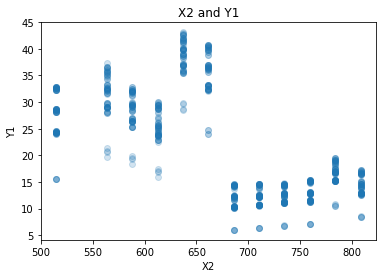

In [22]:
plt.plot(data['X2'], data['Y1'], 'o', alpha = 0.2)
plt.xlabel('X2')
plt.ylabel('Y1')
plt.title('X2 and Y1')
pass

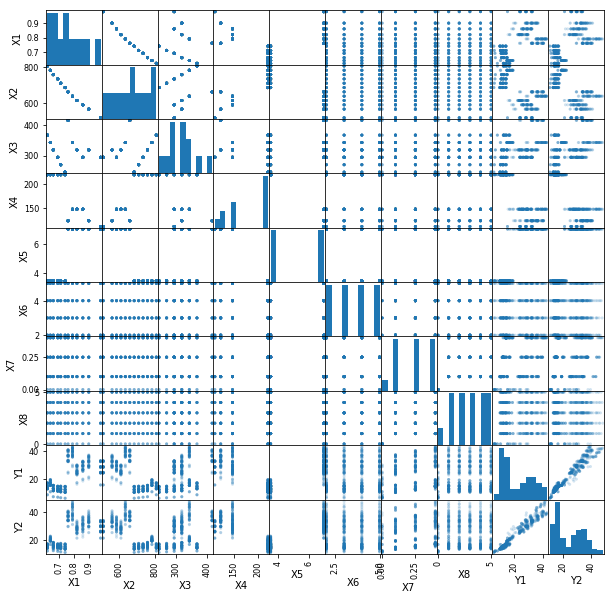

In [23]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data, alpha = .2, figsize = (10, 10))
pass

Последние 5 значений, где охлаждающая нагрузка будет больше 17 едениц

In [24]:
(data['Y2'] > 17.00).tail()

763     True
764    False
765     True
766    False
767    False
Name: Y2, dtype: bool

Диаграмма рассеяния переменных "y1 Нагрузка на отопление" и "y2 Охлаждающая нагрузка" для 3.5 и 7.0 Общей высоты.

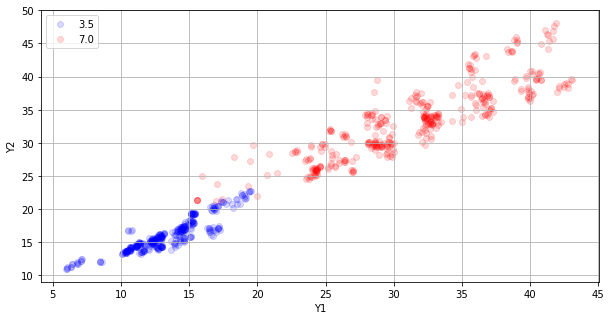

In [25]:
plt.figure(figsize = (10, 5))

plt.scatter(data[data['X5'] == 3.5]['Y1'],
            data[data['X5'] == 3.5]['Y2'],
            alpha = 0.15,
            label = '3.5',
            color = 'b')

plt.scatter(data[data['X5'] == 7.0]['Y1'],
            data[data['X5'] == 7.0]['Y2'],
            alpha = 0.15,
            label = '7.0',
            color = 'r')

plt.xlabel('Y1')
#plt.xticks(range(0,100))
#plt.xlim(0, 17)
plt.ylabel('Y2')
plt.legend()
plt.grid()

In [26]:
data.describe(include = ['float'])

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


Вывод уникальных значений в столбце

In [27]:
data['X1'].unique()

array([ 0.98,  0.9 ,  0.86,  0.82,  0.79,  0.76,  0.74,  0.71,  0.69,
        0.66,  0.64,  0.62])

Минимальное значение в столбце

In [28]:
data['Y1'].min()

6.0099999999999998

In [29]:
for name in data['X1'].unique():
    print(name, data['X2'][data['X1'] == name].iloc[0])

0.98 514.5
0.9 563.5
0.86 588.0
0.82 612.5
0.79 637.0
0.76 661.5
0.74 686.0
0.71 710.5
0.69 735.0
0.66 759.5
0.64 784.0
0.62 808.5


Проверка на количество одинаковых значений в столбце

In [30]:
data['X1'].unique().shape

(12,)

## Готовим данные

In [31]:
data['Y1'].dtype.name

'float64'

In [32]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'int64']
numerical_columns   = [c for c in data.columns if data[c].dtype.name == 'float64']
print(categorical_columns)
print(numerical_columns)

['X6', 'X8']
['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'Y1', 'Y2']


In [33]:
for c in numerical_columns:
    print(c, data[c].unique())

X1 [ 0.98  0.9   0.86  0.82  0.79  0.76  0.74  0.71  0.69  0.66  0.64  0.62]
X2 [ 514.5  563.5  588.   612.5  637.   661.5  686.   710.5  735.   759.5
  784.   808.5]
X3 [ 294.   318.5  343.   416.5  245.   269.5  367.5]
X4 [ 110.25  122.5   147.    220.5 ]
X5 [ 7.   3.5]
X7 [ 0.    0.1   0.25  0.4 ]
Y1 [ 15.55  20.84  21.46  20.71  19.68  19.5   19.95  19.34  18.31  17.05
  17.41  16.95  15.98  28.52  29.9   29.63  28.75  24.77  23.93   6.07
   6.05   6.01   6.04   6.37   6.4    6.85   6.79   6.77   6.81   7.18
   7.1   10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5   24.58
  24.63  24.59  29.03  29.87  29.14  28.09  26.28  26.91  26.37  25.27
  23.53  24.03  23.54  22.58  35.56  37.12  36.9   35.94  32.96  32.12
  32.94  32.21  10.36  10.43  10.39  10.71  10.8   10.7   10.75  11.11
  11.13  11.09  11.16  11.68  11.69  11.7   15.41  15.2   15.42  15.21
  12.96  12.97  12.93  13.02  24.29  24.31  24.13  24.25  28.88  29.68
  28.83  27.9   26.48  27.02  26.33  25.36  23.75  24.23

## Обработка пропущенных значений
Удаление строк или столбцов с пропущенными значениями может существенно уменьшить размер данных, поэтому предпочтительнее заполнить их средним или медианным значениями.

Медиана по столбцам

In [34]:
data.median(axis = 0)

X1      0.75
X2    673.75
X3    318.50
X4    183.75
X5      5.25
X6      3.50
X7      0.25
X8      3.00
Y1     18.95
Y2     22.08
dtype: float64

In [35]:
data = data.fillna(data.median(axis = 0), axis = 0)

Пропущенные значения отсутствуют

In [36]:
data[numerical_columns].count(axis = 0)

X1    768
X2    768
X3    768
X4    768
X5    768
X7    768
Y1    768
Y2    768
dtype: int64

In [37]:
data[categorical_columns].count(axis = 0)

X6    768
X8    768
dtype: int64

Характеристики столбца

In [38]:
data['Y2'].describe()

count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Y2, dtype: float64

In [39]:
type(data['Y2'].describe())

pandas.core.series.Series

Заполнение пропущенных значений в столбце

In [40]:
data['X2'] = data['X2'].fillna(4)

In [41]:
data.describe(include = [float])

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


In [42]:
data.describe(include = [float])

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


## Векторизация

In [43]:
nonbinary_columns = categorical_columns
print(nonbinary_columns)

['X6', 'X8']


In [44]:
data['X6'].unique()

array([2, 3, 4, 5], dtype=int64)

In [45]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['X6', 'X8'], dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. В этом случае количественные признаки полезно нормализовать.

In [46]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


In [47]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [48]:
data_numerical.describe()

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,768.000000,7.680000e+02,7.680000e+02,7.680000e+02
mean,-9.621933e-15,-2.226228e-16,0.000000,-1.439820e-16,0.000000,-1.520485e-14,2.662222e-15,-4.744324e-15
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.362924e+00,-1.784712e+00,-1.684757,-1.469119e+00,-0.999349,-1.759300e+00,-1.615152e+00,-1.438802e+00
25%,-7.720610e-01,-7.416984e-01,-0.561586,-7.910642e-01,-0.999349,-1.008666e+00,-9.231437e-01,-9.426545e-01
50%,-1.339290e-01,2.317808e-02,0.000000,1.582128e-01,0.000000,1.172867e-01,-3.327191e-01,-2.636056e-01
75%,6.223757e-01,7.880546e-01,0.561586,9.718789e-01,0.999349,1.243239e+00,9.276628e-01,8.981883e-01
max,2.040447e+00,1.552931e+00,2.246342,9.718789e-01,0.999349,1.243239e+00,2.060693e+00,2.464153e+00


## Соединяем все в одну таблицу

In [49]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

(768, 10)


In [50]:
data.describe()

,X1,X2,X3,X4,X5,X7,Y1,Y2,X6,X8
count,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,768.00000
mean,-9.621933e-15,-2.226228e-16,0.000000,-1.439820e-16,0.000000,-1.520485e-14,2.662222e-15,-4.744324e-15,3.500000,2.81250
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.118763,1.55096
min,-1.362924e+00,-1.784712e+00,-1.684757,-1.469119e+00,-0.999349,-1.759300e+00,-1.615152e+00,-1.438802e+00,2.000000,0.00000
25%,-7.720610e-01,-7.416984e-01,-0.561586,-7.910642e-01,-0.999349,-1.008666e+00,-9.231437e-01,-9.426545e-01,2.750000,1.75000
50%,-1.339290e-01,2.317808e-02,0.000000,1.582128e-01,0.000000,1.172867e-01,-3.327191e-01,-2.636056e-01,3.500000,3.00000
75%,6.223757e-01,7.880546e-01,0.561586,9.718789e-01,0.999349,1.243239e+00,9.276628e-01,8.981883e-01,4.250000,4.00000
max,2.040447e+00,1.552931e+00,2.246342,9.718789e-01,0.999349,1.243239e+00,2.060693e+00,2.464153e+00,5.000000,5.00000


# X и y

In [51]:
X = data.drop(('X8'), axis = 1)
y = data['X8']
feature_names = X.columns

In [52]:
type(feature_names)

pandas.core.indexes.base.Index

In [53]:
feature_names

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'Y1', 'Y2', 'X6'], dtype='object')

In [54]:
print(X.shape)
print(y.shape)
N, d = X.shape

(768, 9)
(768,)


In [55]:
type(X)

pandas.core.frame.DataFrame

In [56]:
type(y)

pandas.core.series.Series

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

537 231


In [58]:
537 + 231

768

## $k$NN

Объявляем классификатор с параметром $k$ = 10. Проводим обучение модели на обучающей выборке X_train, y_train

In [59]:
from sklearn.neighbors import KNeighborsRegressor

knn_r = KNeighborsRegressor(n_neighbors = 10)
knn_r.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [60]:
knn_r

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

Средняя ошибка

In [61]:
y_train_predict_r = knn_r.predict(X_train)
y_test_predict_r = knn_r.predict(X_test)

err_train_r = np.mean(y_train != y_train_predict_r)
err_test_r  = np.mean(y_test  != y_test_predict_r)

print(err_train_r, err_test_r)

0.966480446927 0.974025974026


## Подбор параметров

Протестируем выборки методом $k$NNRegressor с параметрами от 1 до 55.
Подберем оптимальное(по величине ошибки) значение параметра $k$. В данной выборке получаем $k$=15 с ошибкой ~0.05

In [62]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn_r = KNeighborsRegressor()
grid = GridSearchCV(knn_r, param_grid = {'n_neighbors': nnb}, cv = 10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
cv_err = grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors, cv_err)

0.989357298445 45 0.0106427015548


Проведем классификацию и посчитаем ошибки при данном параметре $k$

In [63]:
knn = KNeighborsRegressor(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.985102420857 0.991341991342


## Нейронные сети

Обучаем регрессор

Проведем задачу классификации 12 различных форм зданий с помощью нейронных сетей
Разобъем данные на тестовую и обучающую выборки

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.083, random_state = 8)
N_test, _ = X_test.shape

Обучаем классификатор вида многослойного персептрона. Активационная функций: логистическая сигмоидальная f(x) = 1 / (1 + exp(-x)). Один скрытый слой с 10-ю нейронами

In [65]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (10), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Предсказываем форму здания и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках

In [66]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

1.0 1.0


Наблюдаем недообучение, т.к. ошибка на тестовой выборке и на обучающей равны

Попробуем использовать персептрон с двумя скрытыми слоями по 10 нейронов в каждом

In [67]:
mlp_model = MLPRegressor(hidden_layer_sizes = (10, 10), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверям качество получившегося регрессора по величине ошибки на тестовой и обучающей выборках

In [68]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

1.0 1.0


### Подбор параметра alpha и числа нейронов.
Подберем оптимальное значение параметра регуляризации alpha

In [69]:
alpha_arr = np.logspace(-1, 0.5, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPRegressor(alpha = alpha, hidden_layer_sizes = (10, 10), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

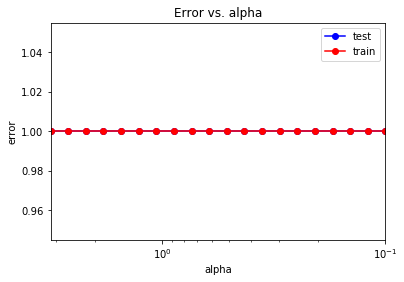

In [70]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [71]:
print(alpha_arr)

[ 0.1         0.11993539  0.14384499  0.17252105  0.20691381  0.24816289
  0.29763514  0.35696988  0.42813324  0.51348329  0.61584821  0.73861998
  0.88586679  1.06246783  1.27427499  1.52830673  1.83298071  2.19839265
  2.6366509   3.16227766]


Минимальное значение ошибки

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

1.0 1.0


Оптимальное значение alpha

In [73]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.1


### Найдем оптимальное количество нейронов

Используем в качестве alpha значение значение по умолчанию (0.0001). Количество скрытых слоев = 2.

In [74]:
neurons_arr = np.arange(2, 10, 1)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPRegressor(hidden_layer_sizes = (neurons, neurons), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

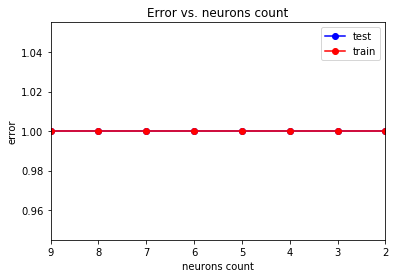

In [75]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'test')
plt.plot(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки

In [76]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

1.0 1.0


Оптимальное число нейронов

In [77]:
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)
neurons_opt = neurons_opt[0]

[2 3 4 5 6 7 8 9]


## Random forests
Разобьем данные на обучающую и тестовую выборки, 33% пойдет в тестовую.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [80]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor(n_estimators = 2)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Проверим качество регрессора по величине ошибки на тестовой и обучающей выборках.

In [81]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.490272373541
Ошибка на тестовой выборке:  0.854330708661


Получилось переобучение. Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев.

In [82]:
tree_arr = np.arange(5, 20, 1)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestRegressor(n_estimators = tree, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not

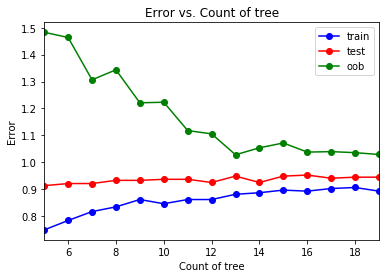

In [83]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Получилось переобучение при 13 деревьях. Минимум oob-ошибки при 19.

Минимальные значения ошибок на обучающей и тестовой выборке:

In [84]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.749027237354
Минимальная ошибка на тестовой выборке:  0.913385826772


Оптимальное количество деревьев:

In [85]:
tree_opt = tree_arr[test_err == min_test_err]
print(tree_opt)

[5]


## Extremely Randomized Trees

Обучаем регрессор Extremely Randomized Trees. Число деревьев = 5.

In [86]:
ert = ensemble.ExtraTreesRegressor(n_estimators = 5)
ert.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [87]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.00778210116732
Ошибка на тестовой выборке:  0.913385826772


Получилось переобучение.

Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев.

In [89]:
tree_arr = np.arange(5, 20, 1)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This p

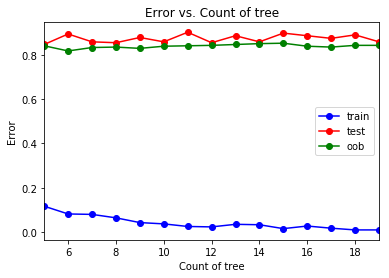

In [90]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке:

In [91]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.00972762645914
Минимальная ошибка на тестовой выборке:  0.846456692913


Оптимальное число деревьев равно:

In [92]:
tree_opt = tree_arr[test_err == min_test_err]
print(tree_opt)

[5]


## AdaBoost

Обучаем регрессор вида Ada Boost. Число регрессоров = 5.

In [94]:
ab = ensemble.AdaBoostRegressor(n_estimators = 5)
ab.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=5, random_state=None)

In [95]:
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.929961089494
Ошибка на тестовой выборке:  0.952755905512


In [96]:
estimator_arr = np.arange(1, 20, 1)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

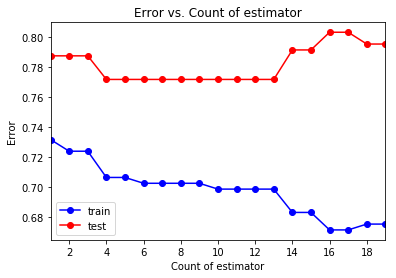

In [97]:
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке:

In [98]:
print(estimator_arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [99]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.671206225681 0.771653543307


Оптимальное количество регрессоров:

In [100]:
estimator_opt = estimator_arr[test_err == min_test_err]
print(estimator_opt)

[ 4  5  6  7  8  9 10 11 12 13]


## Gradient boosted trees

Обучаем Gradient boosted trees регрессор с количеством деревьев равным 5.

In [101]:
gbt = ensemble.GradientBoostingRegressor(n_estimators = 5)
gbt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [102]:
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  1.0
Ошибка на тестовой выборке:  1.0


Построим график зависимости ошибки на тестовой и обучающей выборках от количества деревьев.

In [103]:
tree_arr = np.arange(1, 50, 3)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree)
    gbt.fit(X_train, y_train)
    
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

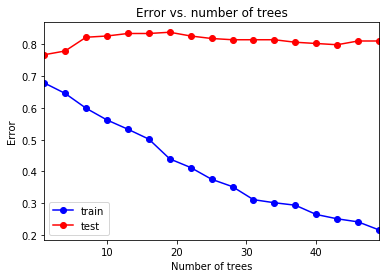

In [104]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке:

In [105]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.215953307393
Минимальная ошибка на тестовой выборке:  0.767716535433


Оптимальное количество деревьев:

In [106]:
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[1]
